<a href="https://colab.research.google.com/github/venkatesh176/AI_Training/blob/main/sklearn_linear_regularizaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
in sklearn,

to build a model,

4 steps we need to follow.

1. import model class
2. create model object
3. train model
4. evalutate the model

ex: Linear regression  with sklearn .

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(max_iter=10000) # 100 iterations by default.

model.fit(X_train, Y_train)

slopes = model.coeffs_
bias = model.intercept_

ycap = model.predict(X_test)

rs = r2_score(Y_test, ycap)
print(rs)
#0.94

# random forest.

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassier(n_estimators = 10)

model.fit(x_train, y_train)

ycap = model.predict(x_test)

acc = r2_score(y_test, ycap) * 100



```



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the data into a DataFrame
df = pd.read_csv('/content/profiles_income.txt')
# Step 2: Prepare features and target
X = df[['age', 'experience']]  # Features: age and experience


In [ ]:
X.head()

,age,experience
0,58,4
1,48,18
2,34,8
3,27,4
4,40,2


In [ ]:
y = df['income']              # Target: income
y.head()

,income
0,136.18
1,150.47
2,99.38
3,77.52
4,92.06


In [ ]:
y.count()

np.int64(50)

In [ ]:

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
X_train.count()

,0
age,40
experience,40


In [ ]:
X_test.count()

,0
age,10
experience,10


In [ ]:

# Step 4: Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
model.coef_

array([2.04438283, 2.89395021])

In [ ]:
model.intercept_

np.float64(6.420592979796282)

In [ ]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 46.32575690552355
R-squared: 0.9489569582911224


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline with polynomial features and linear regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Adding squared terms
    ('model', LinearRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_poly = pipeline.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R-squared:", r2_poly)


Polynomial Regression MSE: 48.03137490349168
Polynomial Regression R-squared: 0.9470776596800442


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline with polynomial features and linear regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),  # Adding cubed terms
    ('model', LinearRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_poly = pipeline.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r3_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R-squared:", r3_poly)


Polynomial Regression MSE: 48.557372039198064
Polynomial Regression R-squared: 0.9464981010170014


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline with polynomial features and linear regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),  # Adding squared terms
    ('model', LinearRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_poly = pipeline.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r4_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R-squared:", r4_poly)


Polynomial Regression MSE: 74.3672504306717
Polynomial Regression R-squared: 0.9180600400496701




```
with Linear :

Mean Squared Error: 46.32575690552355
R-squared: 0.9489569582911224
Coefficients: [2.04438283 2.89395021]
Intercept: 6.420592979796282

with poly degree 2:

Polynomial Regression MSE: 48.03137490349168
Polynomial Regression R-squared: 0.9470776596800442

with poly degree 3:

Polynomial Regression MSE: 48.557372039198064
Polynomial Regression R-squared: 0.9464981010170014

with poly degree 4:

Polynomial Regression MSE: 74.3672504306717
Polynomial Regression R-squared: 0.9180600400496701


```





```
A degree-4 polynomial regression seems to have slightly reduced the model's performance compared to your earlier linear model, as indicated by the increase in MSE and decrease in R-squared. This outcome suggests that the higher-degree polynomial model might be overfitting the data—capturing noise rather than the underlying trends.
```





```
A degree-4 polynomial regression seems to have
 slightly reduced the model's performance
 compared to your earlier linear model, as
  indicated by the increase in MSE and
   decrease in R-squared.
   This outcome suggests that the higher-degree polynomial model might be
    overfitting the data—capturing noise
     rather than the underlying trends.
```



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use scaled features when creating polynomial features


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Train the Linear Regression Model with Scaled Features
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 2: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 3: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (Scaled Features):", mse)
print("R-squared (Scaled Features):", r2)


Mean Squared Error (Scaled Features): 46.32575690552325
R-squared (Scaled Features): 0.9489569582911227


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a Pipeline for Polynomial Regression
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Polynomial degree = 2
    ('model', LinearRegression())  # Linear Regression on the polynomial features
])

# Step 2: Train the Model with Scaled Features
poly_model.fit(X_train_scaled, y_train)

# Step 3: Make Predictions
y_pred_poly = poly_model.predict(X_test_scaled)

# Step 4: Evaluate the Model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (Degree 2) MSE:", mse_poly)
print("Polynomial Regression (Degree 2) R-squared:", r2_poly)


Polynomial Regression (Degree 2) MSE: 48.03137490349567
Polynomial Regression (Degree 2) R-squared: 0.9470776596800398


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a Pipeline for Polynomial Regression
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),  # Polynomial degree = 2
    ('model', LinearRegression())  # Linear Regression on the polynomial features
])

# Step 2: Train the Model with Scaled Features
poly_model.fit(X_train_scaled, y_train)

# Step 3: Make Predictions
y_pred_poly = poly_model.predict(X_test_scaled)

# Step 4: Evaluate the Model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (Degree 3) MSE:", mse_poly)
print("Polynomial Regression (Degree 3) R-squared:", r2_poly)

# Step 5: Coefficients
coefficients = poly_model.named_steps['model'].coef_  # Access linear model coefficients
intercept = poly_model.named_steps['model'].intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Polynomial Regression (Degree 3) MSE: 48.55737203920238
Polynomial Regression (Degree 3) R-squared: 0.9464981010169966
Coefficients: [ 0.00000000e+00  2.11561008e+01  2.66363106e+01 -5.75006668e-01
  1.00343207e+00 -6.91658386e-01  1.12416717e+00 -8.28461732e-01
  3.51458052e-02  1.07420631e-02]
Intercept: 134.84240533557522


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

ridge_poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('ridge', Ridge(alpha=1.0))
])
ridge_poly_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_poly_model.predict(X_test_scaled)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R-squared:", r2_score(y_test, y_pred_ridge))


Ridge MSE: 62.859830856346626
Ridge R-squared: 0.9307392435107537


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

ridge_poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=1.0))
])
ridge_poly_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_poly_model.predict(X_test_scaled)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R-squared:", r2_score(y_test, y_pred_ridge))


Ridge MSE: 50.39982060290522
Ridge R-squared: 0.9444680385816361


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

ridge_poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('ridge', Ridge(alpha=1.0))
])
ridge_poly_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_poly_model.predict(X_test_scaled)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R-squared:", r2_score(y_test, y_pred_ridge))


Ridge MSE: 49.34866736328949
Ridge R-squared: 0.9456262292348736


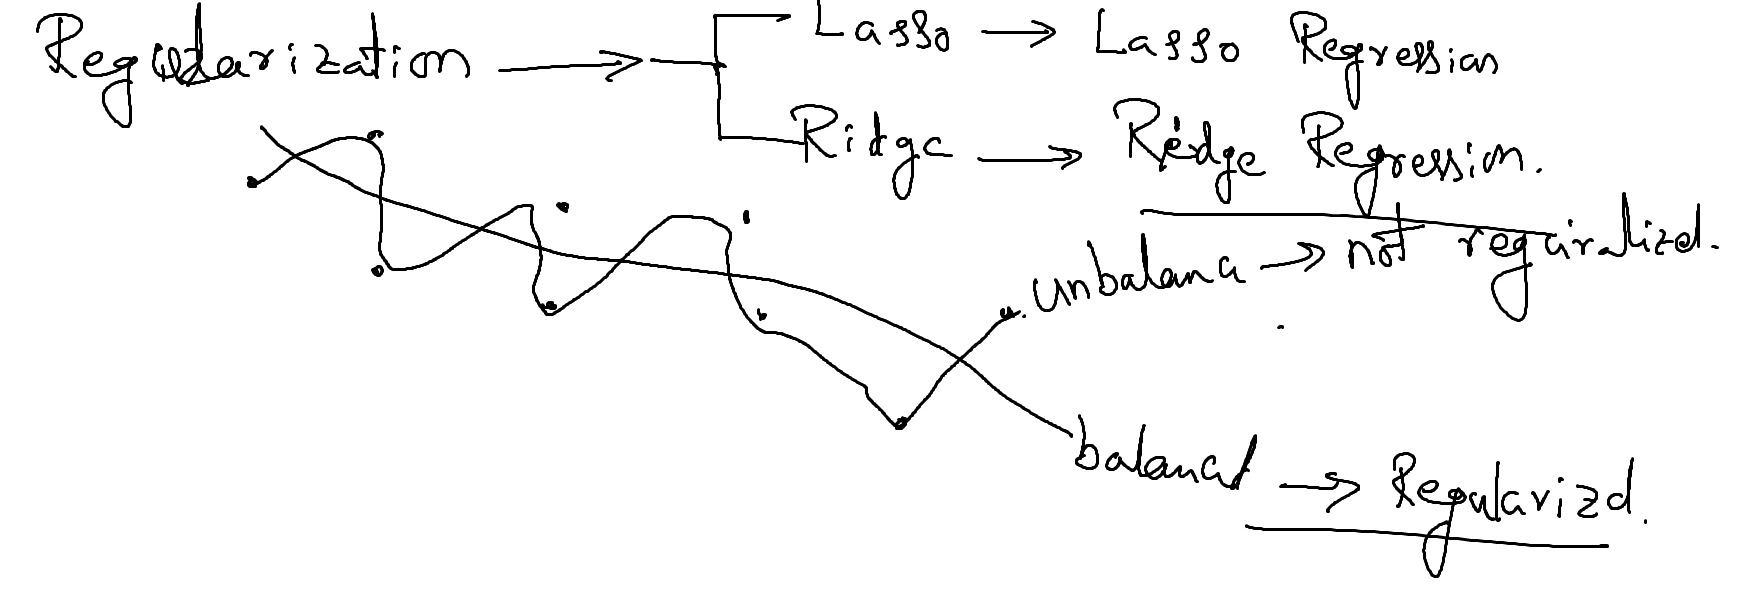

In [ ]:
# next class
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a Pipeline for Polynomial Features and Lasso Regression
lasso_model = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),  # Degree can be adjusted (here it's linear for comparison)
    ('lasso', Lasso(alpha=0.1, max_iter=10000))  # Alpha is the regularization strength; tweak as needed
])

# Step 2: Train the Model with Scaled Features
lasso_model.fit(X_train_scaled, y_train)

# Step 3: Make Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Step 4: Evaluate the Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R-squared:", r2_lasso)

# Step 5: Coefficients and Intercept
coefficients = lasso_model.named_steps['lasso'].coef_  # Access Lasso coefficients
intercept = lasso_model.named_steps['lasso'].intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Lasso Regression MSE: 46.70162830971068
Lasso Regression R-squared: 0.9485428124456433
Coefficients: [ 0.         23.16429615 25.67123015]
Intercept: 133.93225


In [ ]:
import numpy as np

# Step 1: Generate Synthetic Data (with potential multicollinearity)
np.random.seed(42)  # for reproducibility
n_samples = 100
n_features = 2

# Create features (X) with some correlation
X = np.random.rand(n_samples, n_features)
X[:, 1] = X[:, 0] + 0.1 * np.random.randn(n_samples) # Feature 1 is dependent on Feature 0 (multicollinearity!)

# Create true coefficients (beta) and intercept
true_beta = np.array([2.0, -1.5])  # True coefficients for the features
true_intercept = 0.5
noise = 0.1 * np.random.randn(n_samples)

# Generate target variable (y)
y = true_intercept + X @ true_beta + noise # @ is matrix multiplication




In [ ]:
# Step 2: Add Intercept Term to Feature Matrix (X)
X = np.hstack((np.ones((n_samples, 1)), X))  # Add a column of ones for the intercept

X

array([[ 1.        ,  0.37454012,  0.30653765],
       [ 1.        ,  0.73199394,  0.75521931],
       [ 1.        ,  0.15601864,  0.18532589],
       [ 1.        ,  0.05808361, -0.01335153],
       [ 1.        ,  0.60111501,  0.78769246],
       [ 1.        ,  0.02058449,  0.06796779],
       [ 1.        ,  0.83244264,  0.71331229],
       [ 1.        ,  0.18182497,  0.24748033],
       [ 1.        ,  0.30424224,  0.20677408],
       [ 1.        ,  0.43194502,  0.51065348],
       [ 1.        ,  0.61185289,  0.72771245],
       [ 1.        ,  0.29214465,  0.21007642],
       [ 1.        ,  0.45606998,  0.5524076 ],
       [ 1.        ,  0.19967378,  0.24095187],
       [ 1.        ,  0.59241457,  0.67462058],
       [ 1.        ,  0.60754485,  0.79722415],
       [ 1.        ,  0.06505159,  0.04051278],
       [ 1.        ,  0.96563203,  0.89025842],
       [ 1.        ,  0.30461377,  0.21566233],
       [ 1.        ,  0.68423303,  0.602652  ],
       [ 1.        ,  0.12203823,  0.114

In [ ]:
# Step 3: Define Ridge Regression Parameters
alpha = 0.1  # Regularization parameter
learning_rate = 0.01
n_iterations = 1000


In [ ]:
# Step 4: Initialize Coefficients (beta)
beta = np.zeros(X.shape[1]) # start with all zeros
